In [2]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [4]:
raw_stats_longs = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output/stats_shorts.pickle")

In [27]:
raw_stats_longs = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_longs = raw_stats_longs[raw_stats_longs['stop_b'] == 1.6]
raw_stats_longs = raw_stats_longs[raw_stats_longs['stop_b'] * 2 == raw_stats_longs['target_b']]

In [28]:
raw_stats_longs.head(1000)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
153,0.25,4.0,0.1,0.0,1.6,0.0,3.2,0.54,1.06,0.32,1.97,2.0,1.01,1.0,0.36,276,38.77,42.6,1.25,0.08,3.31,15.2,2.8


<AxesSubplot:xlabel='median_stop'>

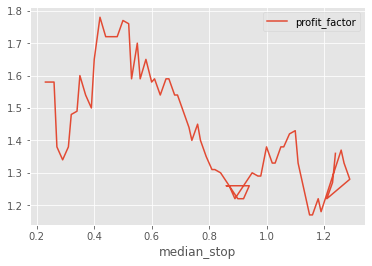

In [32]:
raw_stats_longs.plot(x='median_stop', y='profit_factor')

Text(0.5, 1.0, 'Stop / Target vs Profit Factor')

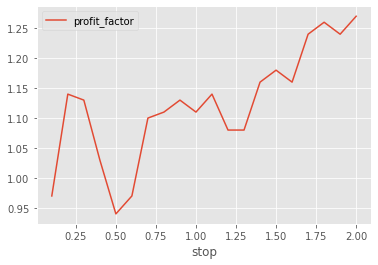

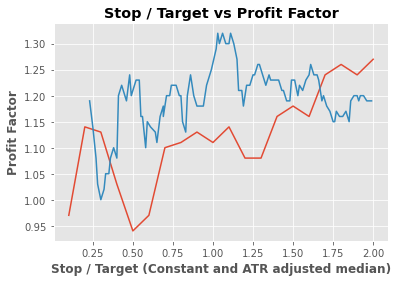

In [43]:
# GET RESULTS WITH ATR
raw_stats_longs_with_atr = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_longs_with_atr = raw_stats_longs_with_atr[raw_stats_longs_with_atr['stop_b'] == raw_stats_longs_with_atr['target_b']]

# GET RESULTS WITHOUT ATR
raw_stats_longs_no_atr = pandas.read_pickle("../../holy_grail_with_rvol/output/stats_longs.pickle")
raw_stats_longs_no_atr = raw_stats_longs_no_atr[(raw_stats_longs_no_atr['min_distance'] == 0.25) & (raw_stats_longs_no_atr['max_rvol'] == 4.0) & (raw_stats_longs_no_atr['buffer'] == 0.1) & (raw_stats_longs_no_atr['target'] == raw_stats_longs_no_atr['stop'])]
raw_stats_longs_no_atr.plot(x='stop', y='profit_factor')

import matplotlib.pyplot as plt
# plt.style.use("ggplot")

fig, ax = plt.subplots()
plt.plot(raw_stats_longs_no_atr['stop'], raw_stats_longs_no_atr['profit_factor'])
plt.plot(raw_stats_longs_with_atr['median_stop'], raw_stats_longs_with_atr['profit_factor'])
ax.set_xlabel('Stop / Target (Constant and ATR adjusted median)', fontweight ='bold')
ax.set_ylabel('Profit Factor', fontweight ='bold')
ax.set_title('Stop / Target vs Profit Factor', fontweight ='bold')


Text(0.5, 1.0, 'Stop / Target vs Profit Factor')

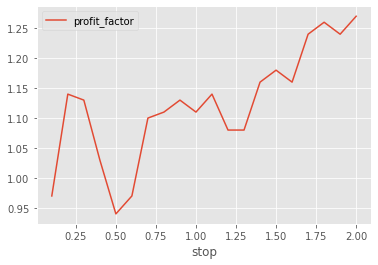

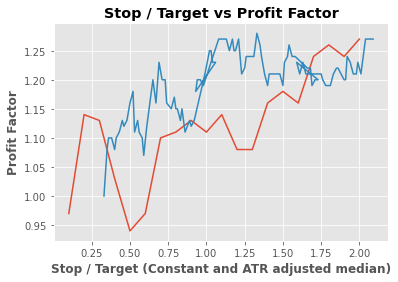

In [44]:
# TRYING WITH A = 0.1
# GET RESULTS WITH ATR
raw_stats_longs_with_atr = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_longs_with_atr = raw_stats_longs_with_atr[raw_stats_longs_with_atr['stop_b'] == raw_stats_longs_with_atr['target_b']]

# GET RESULTS WITHOUT ATR
raw_stats_longs_no_atr = pandas.read_pickle("../../holy_grail_with_rvol/output/stats_longs.pickle")
raw_stats_longs_no_atr = raw_stats_longs_no_atr[(raw_stats_longs_no_atr['min_distance'] == 0.25) & (raw_stats_longs_no_atr['max_rvol'] == 4.0) & (raw_stats_longs_no_atr['buffer'] == 0.1) & (raw_stats_longs_no_atr['target'] == raw_stats_longs_no_atr['stop'])]
raw_stats_longs_no_atr.plot(x='stop', y='profit_factor')

import matplotlib.pyplot as plt
# plt.style.use("ggplot")

fig, ax = plt.subplots()
plt.plot(raw_stats_longs_no_atr['stop'], raw_stats_longs_no_atr['profit_factor'])
plt.plot(raw_stats_longs_with_atr['median_stop'], raw_stats_longs_with_atr['profit_factor'])
ax.set_xlabel('Stop / Target (Constant and ATR adjusted median)', fontweight ='bold')
ax.set_ylabel('Profit Factor', fontweight ='bold')
ax.set_title('Stop / Target vs Profit Factor', fontweight ='bold')


In [48]:
raw_stats_longs_with_atr = pandas.read_pickle("../output/stats_longs.pickle")
# raw_stats_longs_with_atr = raw_stats_longs_with_atr[raw_stats_longs_with_atr['stop_b'] == raw_stats_longs_with_atr['target_b']]

In [24]:
stats['median_target'].unique()[1]

0.27

In [106]:
stats = pandas.read_pickle("../output/stats_longs.pickle")
stats = stats[2.5*stats['stop_b'] == stats['target_b']]
stats.sort_values(by='return_to_dd_ratio', ascending=False).head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
284,0.25,4.0,0.1,0.0,2.0,0.0,5.0,0.67,1.66,0.32,2.43,2.5,1.00,1.0,1.81,276,34.42,50.36,231.69,181.33,1.28,0.07,3.77,20.15,2.50
157,0.25,4.0,0.1,0.0,1.6,0.0,4.0,0.54,1.33,0.32,2.46,2.5,1.01,1.0,0.36,276,32.61,36.02,223.22,187.20,1.19,0.05,1.90,20.68,1.74
180,0.25,4.0,0.1,0.0,2.4,0.0,6.0,0.80,1.99,0.32,2.35,2.5,1.00,1.0,4.35,276,32.97,28.29,212.42,184.13,1.15,0.04,1.24,21.93,1.29
2,0.25,4.0,0.1,0.0,0.8,0.0,2.0,0.27,0.67,0.32,2.46,2.5,1.01,1.0,0.36,276,31.88,28.55,218.60,190.05,1.15,0.04,1.19,26.59,1.07
96,0.25,4.0,0.1,0.0,1.2,0.0,3.0,0.40,0.99,0.32,2.46,2.5,1.01,1.0,0.36,276,30.07,11.52,205.58,194.06,1.06,0.02,0.19,24.09,0.48


In [105]:
stats_ts = pandas.read_pickle("../output_ts/stats_longs.pickle")
stats_ts = stats_ts[2.5*stats_ts['stop_b'] == stats_ts['target_b']]
stats_ts.sort_values(by='return_to_dd_ratio', ascending=False).head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
218,0.25,4.0,0.1,0.0,2.0,0.0,5.0,0.67,1.66,0.32,2.61,2.5,0.93,1.0,1.81,276,33.33,52.55,224.19,171.64,1.31,0.08,4.11,19.15,2.74
312,0.25,4.0,0.1,0.0,2.4,0.0,6.0,0.80,1.99,0.32,2.47,2.5,0.94,1.0,4.35,276,32.25,31.06,207.43,176.37,1.18,0.05,1.50,21.01,1.48
157,0.25,4.0,0.1,0.0,1.6,0.0,4.0,0.54,1.33,0.32,2.70,2.5,0.92,1.0,0.36,276,30.07,28.41,205.73,177.32,1.16,0.04,1.18,19.96,1.42
63,0.25,4.0,0.1,0.0,1.2,0.0,3.0,0.40,0.99,0.32,2.71,2.5,0.92,1.0,0.36,276,29.71,25.53,203.10,177.57,1.14,0.04,0.95,21.85,1.17
101,0.25,4.0,0.1,0.0,0.8,0.0,2.0,0.27,0.67,0.32,2.64,2.5,0.94,1.0,0.36,276,30.07,24.71,205.95,181.24,1.14,0.04,0.89,31.19,0.79


In [103]:
stats_ts['total_positive_return_r'].median()

223.22

In [104]:
stats['total_positive_return_r'].median()

230.77

In [64]:
stats_ts = pandas.read_pickle("../output_ts/stats_longs.pickle")
stats_ts = stats_ts[2*stats_ts['stop_b'] == stats_ts['target_b']]
stats_ts.sort_values(by='stop_b', ascending=False).head(20)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
363,0.25,4.0,0.1,0.0,3.0,0.0,6.0,0.99,1.99,0.32,2.07,2.0,0.91,1.0,4.71,276,37.32,36.10,193.10,157.00,1.23,0.07,2.52,17.44,2.07
333,0.25,4.0,0.1,0.0,2.8,0.0,5.6,0.93,1.86,0.32,2.07,2.0,0.92,1.0,3.99,276,37.32,36.91,195.34,158.43,1.23,0.07,2.60,19.09,1.93
303,0.25,4.0,0.1,0.0,2.6,0.0,5.2,0.86,1.73,0.32,2.11,2.0,0.91,1.0,2.90,276,37.32,40.11,198.29,158.18,1.25,0.08,3.03,19.45,2.06
273,0.25,4.0,0.1,0.0,2.4,0.0,4.8,0.80,1.60,0.32,2.11,2.0,0.92,1.0,1.81,276,35.51,26.76,190.62,163.86,1.16,0.05,1.33,15.96,1.68
243,0.25,4.0,0.1,0.0,2.2,0.0,4.4,0.73,1.46,0.32,2.15,2.0,0.92,1.0,0.72,276,36.23,35.49,197.62,162.13,1.22,0.07,2.31,11.45,3.10
213,0.25,4.0,0.1,0.0,2.0,0.0,4.0,0.67,1.33,0.32,2.19,2.0,0.91,1.0,0.36,276,35.87,36.40,196.74,160.34,1.23,0.07,2.42,11.82,3.08
183,0.25,4.0,0.1,0.0,1.8,0.0,3.6,0.59,1.19,0.32,2.22,2.0,0.90,1.0,0.36,276,34.42,26.55,188.57,162.02,1.16,0.05,1.29,15.42,1.72
153,0.25,4.0,0.1,0.0,1.6,0.0,3.2,0.54,1.06,0.32,2.26,2.0,0.88,1.0,0.36,276,35.87,41.00,196.83,155.83,1.26,0.07,3.06,11.88,3.45
123,0.25,4.0,0.1,0.0,1.4,0.0,2.8,0.46,0.93,0.32,2.27,2.0,0.88,1.0,0.36,276,32.97,18.90,180.98,162.08,1.12,0.03,0.65,17.94,1.05
93,0.25,4.0,0.1,0.0,1.2,0.0,2.4,0.40,0.80,0.32,2.26,2.0,0.88,1.0,0.36,276,32.97,18.03,180.66,162.63,1.11,0.03,0.59,19.49,0.93
